In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from math import ceil

In [2]:
df = pd.read_csv("/kaggle/input/bengaluru-house-prices/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

array([[<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'balcony'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

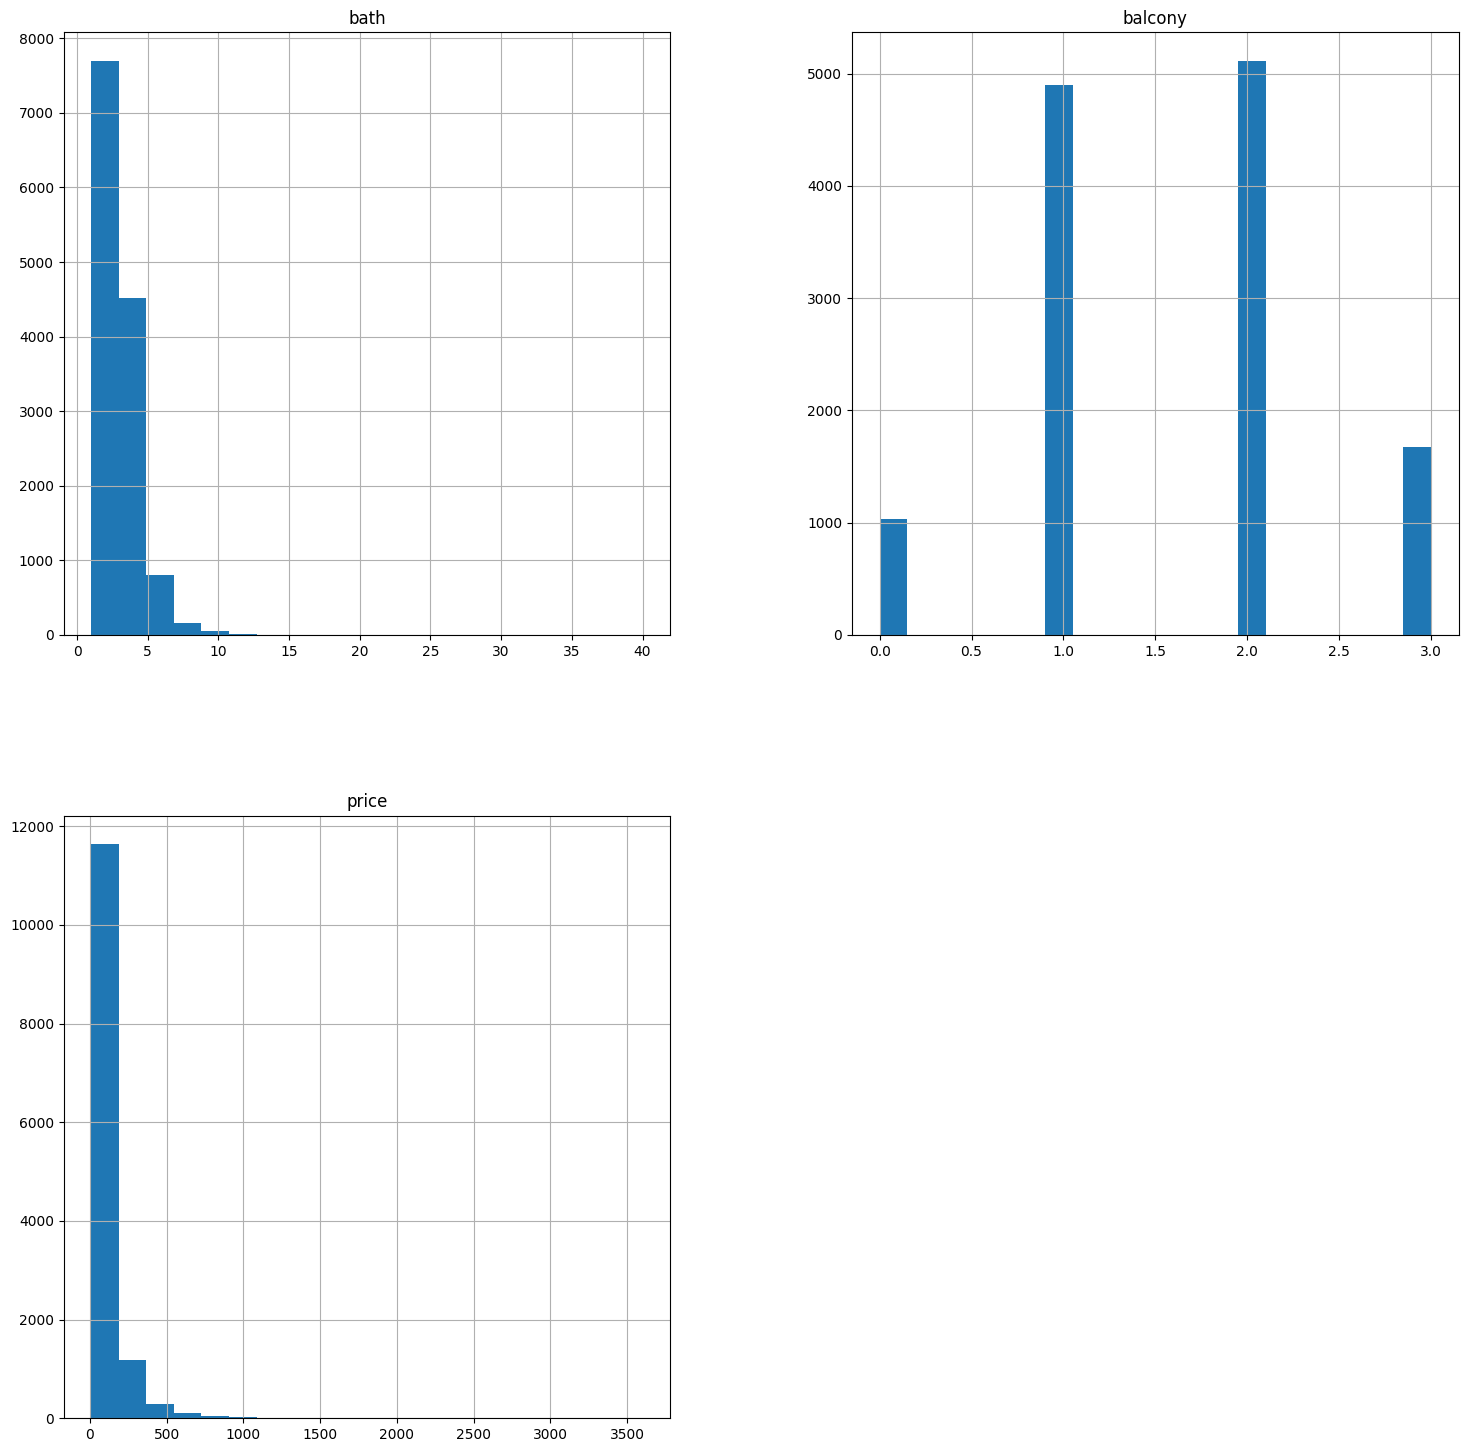

In [6]:
df.hist(figsize=(18, 18), bins=20)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
columns_with_nan

['location', 'size', 'society', 'bath', 'balcony']

In [9]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [12]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [13]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [14]:
label_encoder = LabelEncoder()
df['availability'] = label_encoder.fit_transform(df['availability'].astype(str))
df['society'] = label_encoder.fit_transform(df['society'])

In [15]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)

In [16]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,40,Electronic City Phase II,2 BHK,464,1056,2.0,1.0,39.07,False,False,True
1,80,Chikka Tirupathi,4 Bedroom,2439,2600,5.0,3.0,120.00,False,True,False
2,80,Uttarahalli,3 BHK,806,1440,2.0,3.0,62.00,False,False,False
3,80,Lingadheeranahalli,3 BHK,2186,1521,3.0,1.0,95.00,False,False,True
4,80,Kothanur,2 BHK,806,1200,2.0,1.0,51.00,False,False,True


In [17]:
df.shape

(13320, 11)

In [18]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df[~df['total_sqft'].apply(is_float)].head(10)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
30,40,Yelahanka,4 BHK,1106,2100 - 2850,4.0,0.0,186.000,False,False,True,4
56,53,Devanahalli,4 Bedroom,327,3010 - 3410,2.0,2.0,192.000,False,False,False,4
81,36,Hennur Road,4 Bedroom,774,2957 - 3450,2.0,2.0,224.500,False,False,False,4
122,33,Hebbal,4 BHK,1863,3067 - 8156,4.0,0.0,477.000,False,False,True,4
137,45,8th Phase JP Nagar,2 BHK,2545,1042 - 1105,2.0,0.0,54.005,False,False,True,2
165,28,Sarjapur,2 BHK,1035,1145 - 1340,2.0,0.0,43.490,False,False,True,2
188,80,KR Puram,2 BHK,1145,1015 - 1540,2.0,0.0,56.800,False,False,True,2
224,40,Devanahalli,3 BHK,980,1520 - 1740,2.0,2.0,74.820,False,False,True,3
410,80,Kengeri,1 BHK,806,34.46Sq. Meter,1.0,0.0,18.500,False,False,True,1
549,37,Hennur Road,2 BHK,2111,1195 - 1440,2.0,0.0,63.770,False,False,True,2


In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [22]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df = df[df["total_sqft"].notnull()]
df.head(10)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,40,Electronic City Phase II,2 BHK,464,1056.0,2.0,1.0,39.07,False,False,True,2
1,80,Chikka Tirupathi,4 Bedroom,2439,2600.0,5.0,3.0,120.00,False,True,False,4
2,80,Uttarahalli,3 BHK,806,1440.0,2.0,3.0,62.00,False,False,False,3
3,80,Lingadheeranahalli,3 BHK,2186,1521.0,3.0,1.0,95.00,False,False,True,3
4,80,Kothanur,2 BHK,806,1200.0,2.0,1.0,51.00,False,False,True,2
5,80,Whitefield,2 BHK,607,1170.0,2.0,1.0,38.00,False,False,True,2
6,34,Old Airport Road,4 BHK,939,2732.0,4.0,2.0,204.00,False,False,True,4
7,80,Rajaji Nagar,4 BHK,360,3300.0,4.0,2.0,600.00,False,False,True,4
8,80,Marathahalli,3 BHK,806,1310.0,3.0,1.0,63.25,False,False,True,3
9,80,Gandhi Bazar,6 Bedroom,806,1020.0,6.0,2.0,370.00,False,True,False,6


In [23]:
df.loc[30]

availability                             40
location                          Yelahanka
size                                  4 BHK
society                                1106
total_sqft                           2475.0
bath                                    4.0
balcony                                 0.0
price                                 186.0
area_type_Carpet  Area                False
area_type_Plot  Area                  False
area_type_Super built-up  Area         True
bhk                                       4
Name: 30, dtype: object

In [24]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,40,Electronic City Phase II,2 BHK,464,1056.0,2.0,1.0,39.07,False,False,True,2,3699.810606
1,80,Chikka Tirupathi,4 Bedroom,2439,2600.0,5.0,3.0,120.00,False,True,False,4,4615.384615
2,80,Uttarahalli,3 BHK,806,1440.0,2.0,3.0,62.00,False,False,False,3,4305.555556
3,80,Lingadheeranahalli,3 BHK,2186,1521.0,3.0,1.0,95.00,False,False,True,3,6245.890861
4,80,Kothanur,2 BHK,806,1200.0,2.0,1.0,51.00,False,False,True,2,4250.000000


In [25]:
df.shape

(13274, 13)

In [26]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    271
Thanisandra                       236
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1288, dtype: int64

In [27]:
location_stats.values.sum()

13274

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar                   10
BTM 1st Stage                     10
Nagadevanahalli                   10
Sector 1 HSR Layout               10
Basapura                          10
                                  ..
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1048, dtype: int64

In [29]:
len(df.location.unique())

1288

In [30]:
df["location"] = df["location"].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df["location"].unique())

241

In [31]:
df.shape

(13274, 13)

In [32]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12530, 13)

In [33]:
df.price_per_sqft.describe()


count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10302, 13)

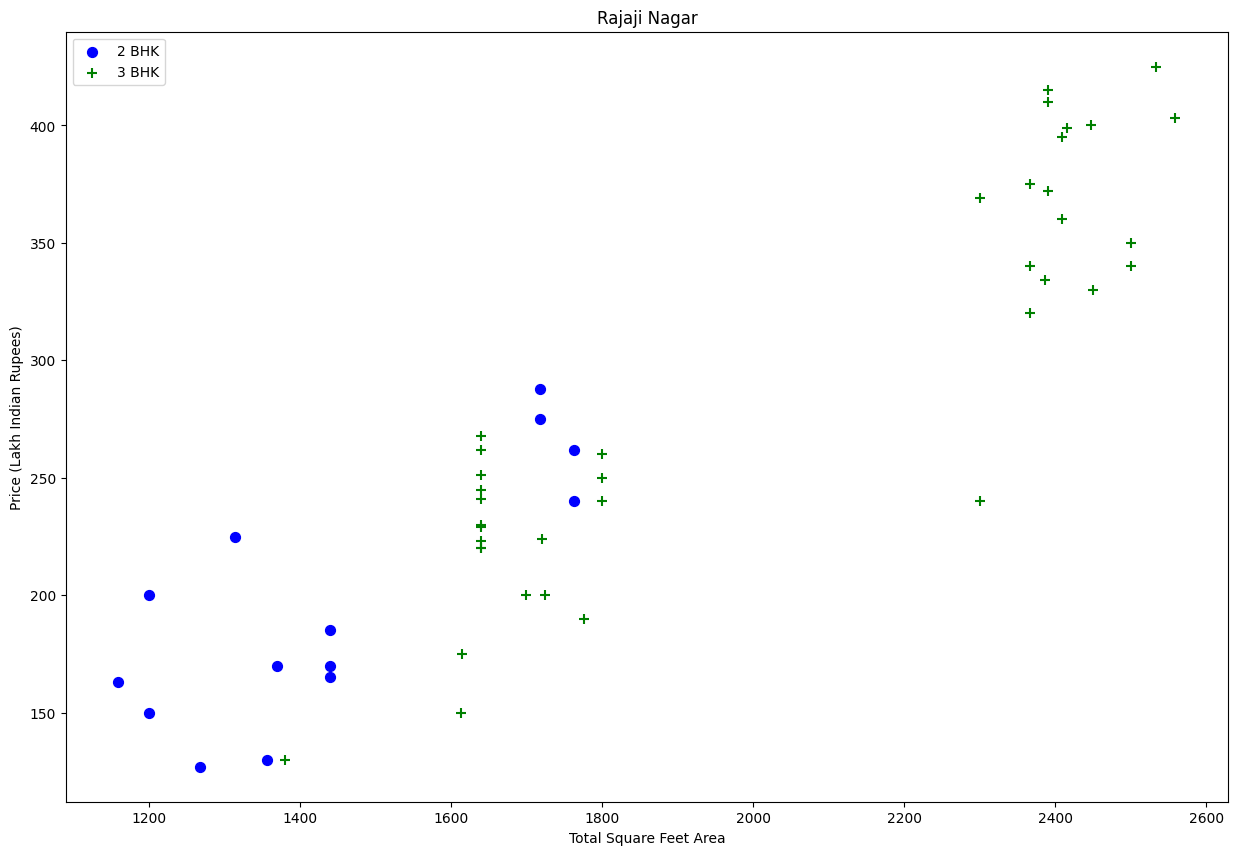

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

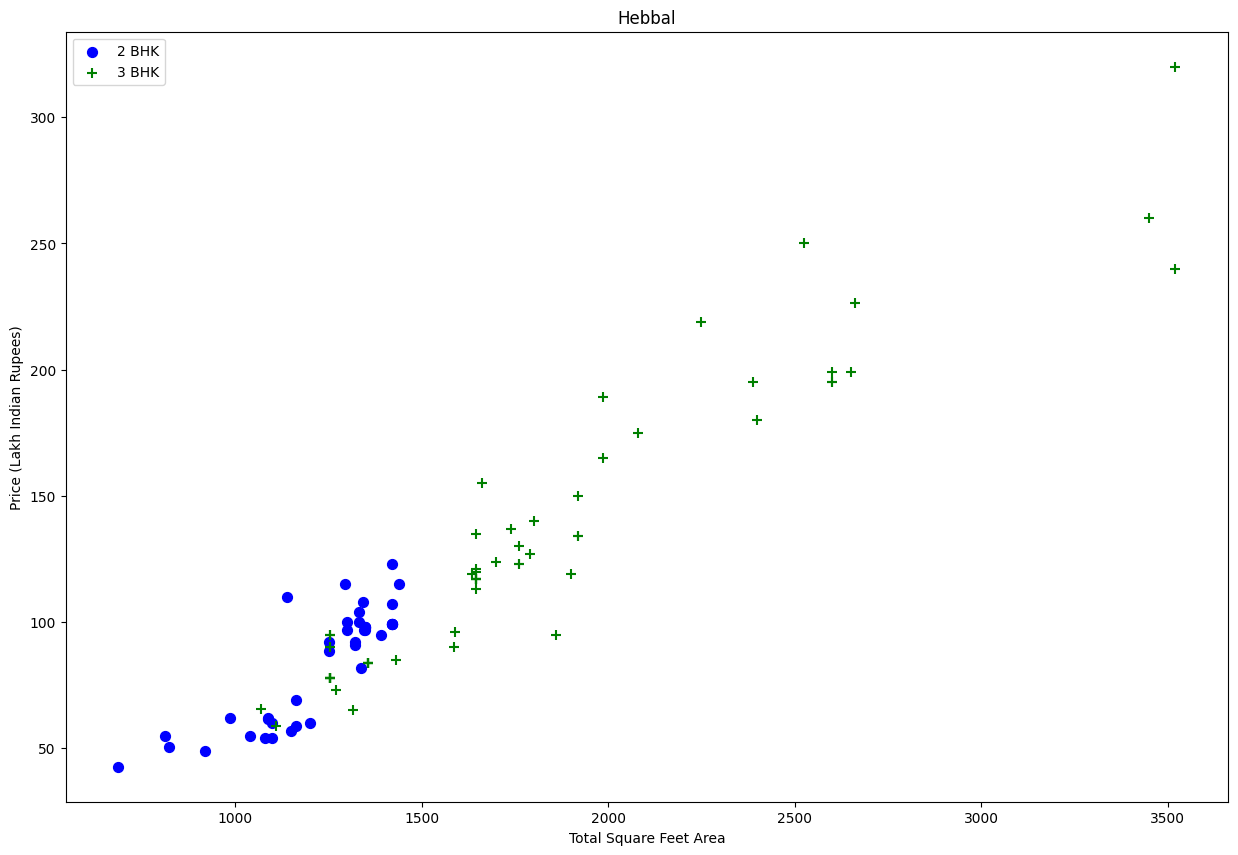

In [36]:
plot_scatter_chart(df,"Hebbal")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7348, 13)

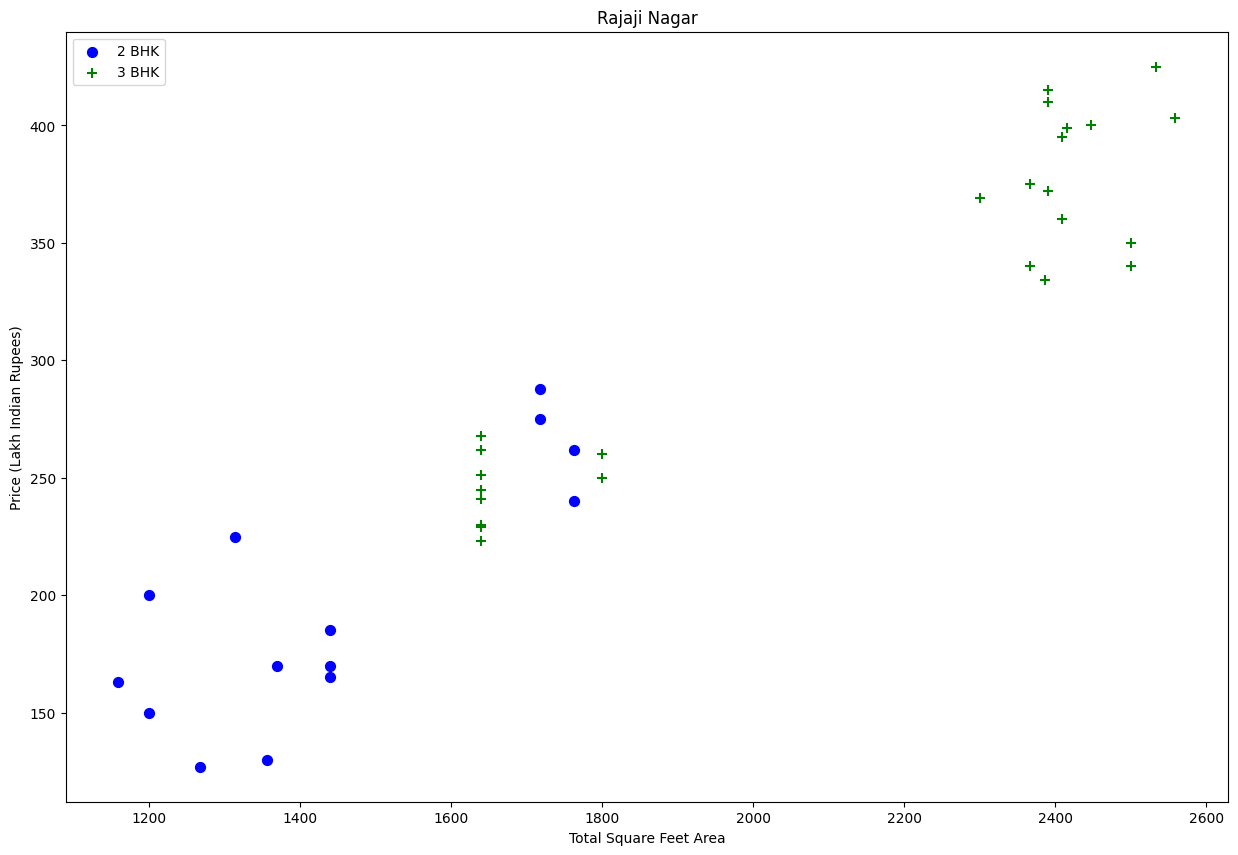

In [38]:
plot_scatter_chart(df,"Rajaji Nagar")

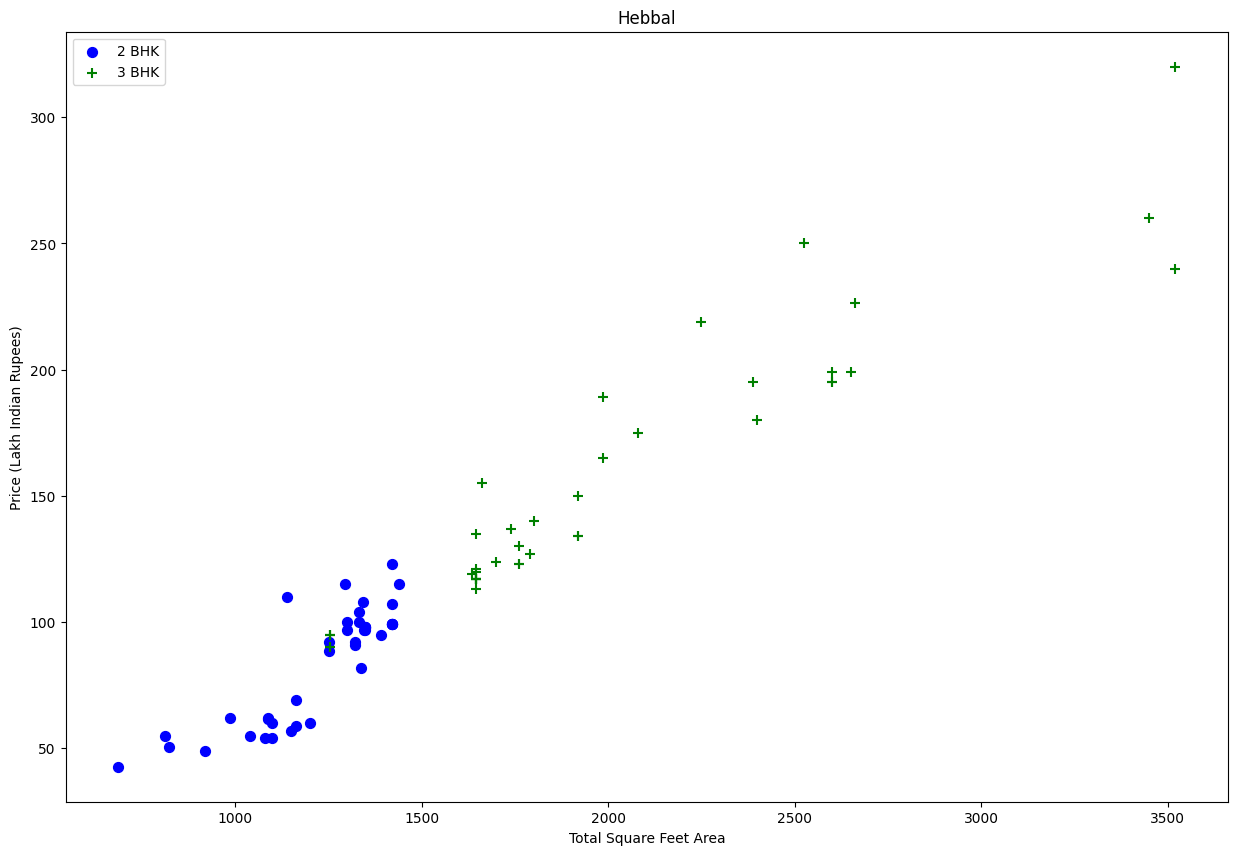

In [39]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

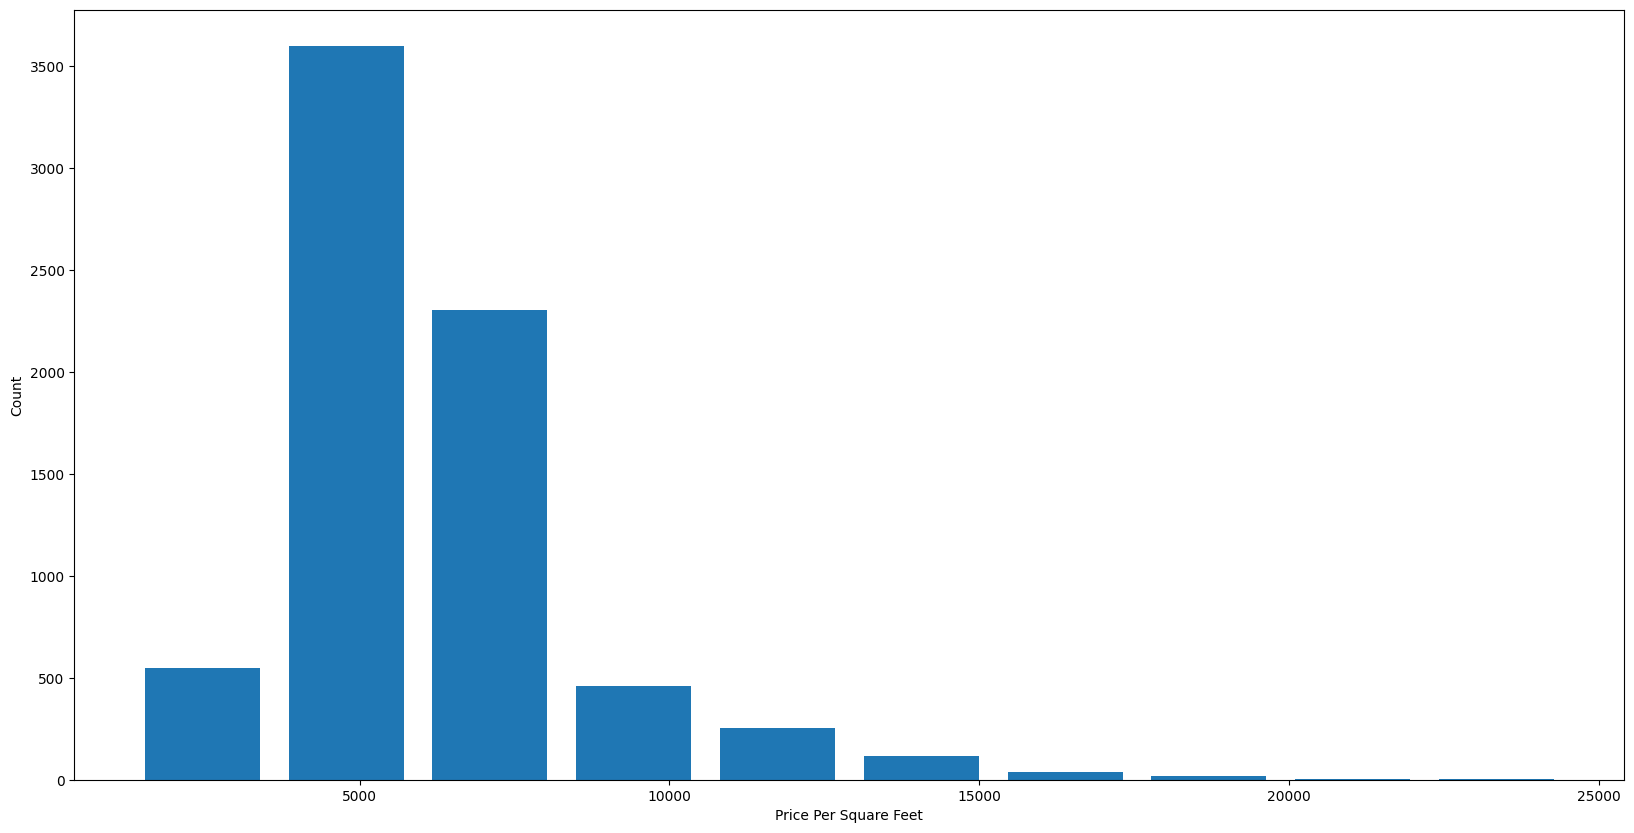

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

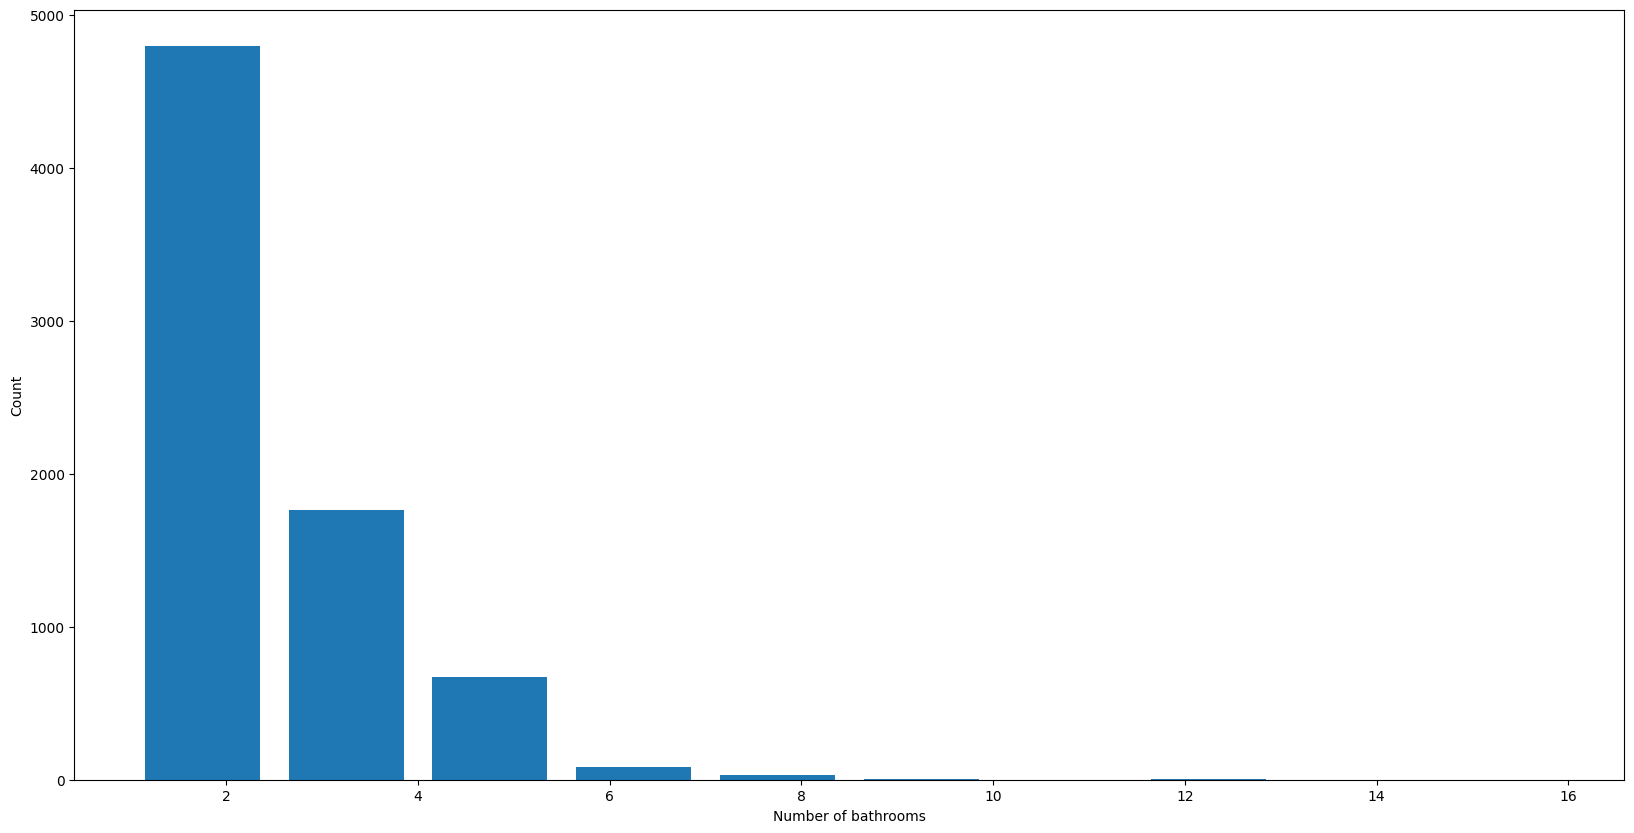

In [42]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df[df.bath>10]

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
5313,80,Neeladri Nagar,10 BHK,806,4000.0,12.0,2.0,160.0,False,False,True,10,4000.000000
8540,80,other,10 BHK,806,12000.0,12.0,2.0,525.0,False,False,True,10,4375.000000
8629,80,other,16 BHK,806,10000.0,16.0,2.0,550.0,False,False,True,16,5500.000000
9363,80,other,11 BHK,806,6000.0,12.0,2.0,150.0,False,False,True,11,2500.000000
9695,80,other,13 BHK,806,5425.0,13.0,0.0,275.0,False,False,True,13,5069.124424


In [44]:
df[df.bath>df.bhk+2]

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
1637,80,Chikkabanavar,4 Bedroom,806,2460.0,7.0,2.0,80.0,False,False,False,4,3252.032520
5274,80,Nagasandra,4 Bedroom,806,7000.0,8.0,2.0,450.0,False,False,False,4,6428.571429
6759,80,Thanisandra,3 BHK,2199,1806.0,6.0,2.0,116.0,False,False,True,3,6423.034330
8465,80,other,6 BHK,1621,11338.0,9.0,1.0,1000.0,False,False,True,6,8819.897689


In [45]:
df = df[df.bath<df.bhk+2]
df.shape

(7269, 13)

In [46]:
df.head(2)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,price_per_sqft
0,58,1st Block Jayanagar,4 BHK,806,2850.0,4.0,1.0,428.0,False,False,True,4,15017.543860
1,32,1st Block Jayanagar,3 BHK,806,1630.0,3.0,2.0,194.0,False,False,True,3,11901.840491


In [47]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,availability,location,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,58,1st Block Jayanagar,806,2850.0,4.0,1.0,428.0,False,False,True,4
1,32,1st Block Jayanagar,806,1630.0,3.0,2.0,194.0,False,False,True,3
2,80,1st Block Jayanagar,806,1875.0,2.0,3.0,235.0,False,False,True,3


In [48]:
dummies = pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,availability,location,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,58,1st Block Jayanagar,806,2850.0,4.0,1.0,428.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,32,1st Block Jayanagar,806,1630.0,3.0,2.0,194.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,80,1st Block Jayanagar,806,1875.0,2.0,3.0,235.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3,1st Block Jayanagar,312,1200.0,2.0,0.0,130.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,32,1st Block Jayanagar,806,1235.0,2.0,2.0,148.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df = df.drop('location',axis='columns')
df.head(2)

,availability,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,58,806,2850.0,4.0,1.0,428.0,False,False,True,4,...,False,False,False,False,False,False,False,False,False,False
1,32,806,1630.0,3.0,2.0,194.0,False,False,True,3,...,False,False,False,False,False,False,False,False,False,False


In [51]:
corr = df.corrwith(df['price']).sort_values()
corr

area_type_Super built-up  Area   -0.132641
Chandapura                       -0.074900
Uttarahalli                      -0.065556
Electronic City Phase II         -0.064115
Electronic City                  -0.059872
                                    ...   
Cunningham Road                   0.258909
bhk                               0.572936
bath                              0.596287
total_sqft                        0.841437
price                             1.000000
Length: 250, dtype: float64

In [52]:
correlation_with_target = df.corr()['price']

threshold = 0.05
negative_corr_features = correlation_with_target[correlation_with_target < threshold].index.tolist()

df = df.drop(negative_corr_features, axis=1)

In [53]:
corr = df.corrwith(df['price']).sort_values()
corr

Old Airport Road         0.053451
Sarakki Nagar            0.053935
Hebbal                   0.054528
Banashankari Stage II    0.056690
Hebbal Kempapura         0.059288
Hosakerehalli            0.060463
1st Block Jayanagar      0.062345
Whitefield               0.066209
Kodihalli                0.067352
Cooke Town               0.069661
HAL 2nd Stage            0.070437
Iblur Village            0.071978
Koramangala              0.082806
Benson Town              0.084096
Frazer Town              0.087329
Giri Nagar               0.107713
Indira Nagar             0.112311
Malleshwaram             0.144382
Rajaji Nagar             0.197723
area_type_Plot  Area     0.200675
balcony                  0.211520
Cunningham Road          0.258909
bhk                      0.572936
bath                     0.596287
total_sqft               0.841437
price                    1.000000
dtype: float64

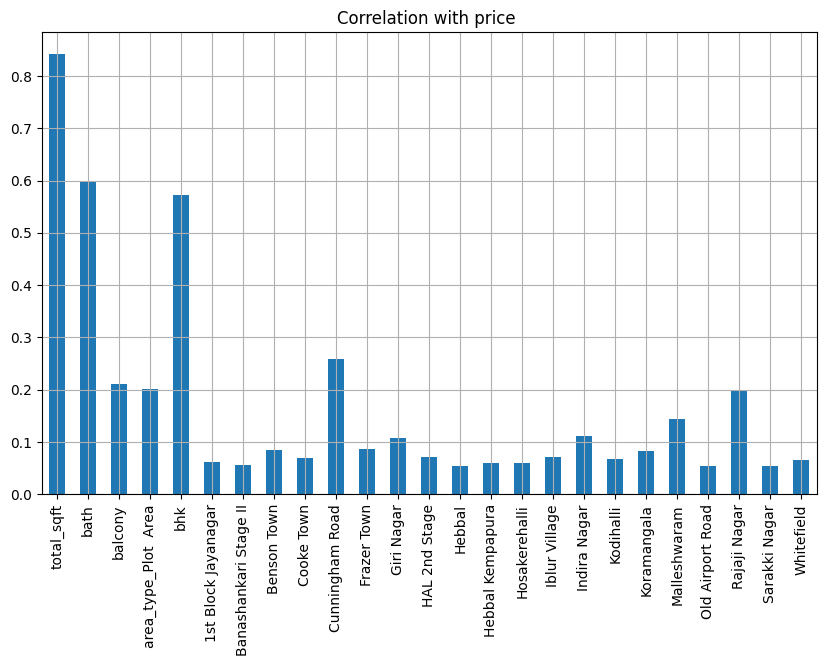

In [54]:
df.drop('price',axis=1).corrwith(df.price).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with price ")
plt.show()

In [55]:
df.shape

(7269, 26)

In [56]:
X = df.drop(['price'],axis='columns')
X.head(5)

,total_sqft,bath,balcony,area_type_Plot Area,bhk,1st Block Jayanagar,Banashankari Stage II,Benson Town,Cooke Town,Cunningham Road,...,Hosakerehalli,Iblur Village,Indira Nagar,Kodihalli,Koramangala,Malleshwaram,Old Airport Road,Rajaji Nagar,Sarakki Nagar,Whitefield
0,2850.0,4.0,1.0,False,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,False,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,False,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,False,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,False,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
X.shape

(7269, 25)

In [58]:
y = df.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [59]:
len(y)

7269

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>]], dtype=object)

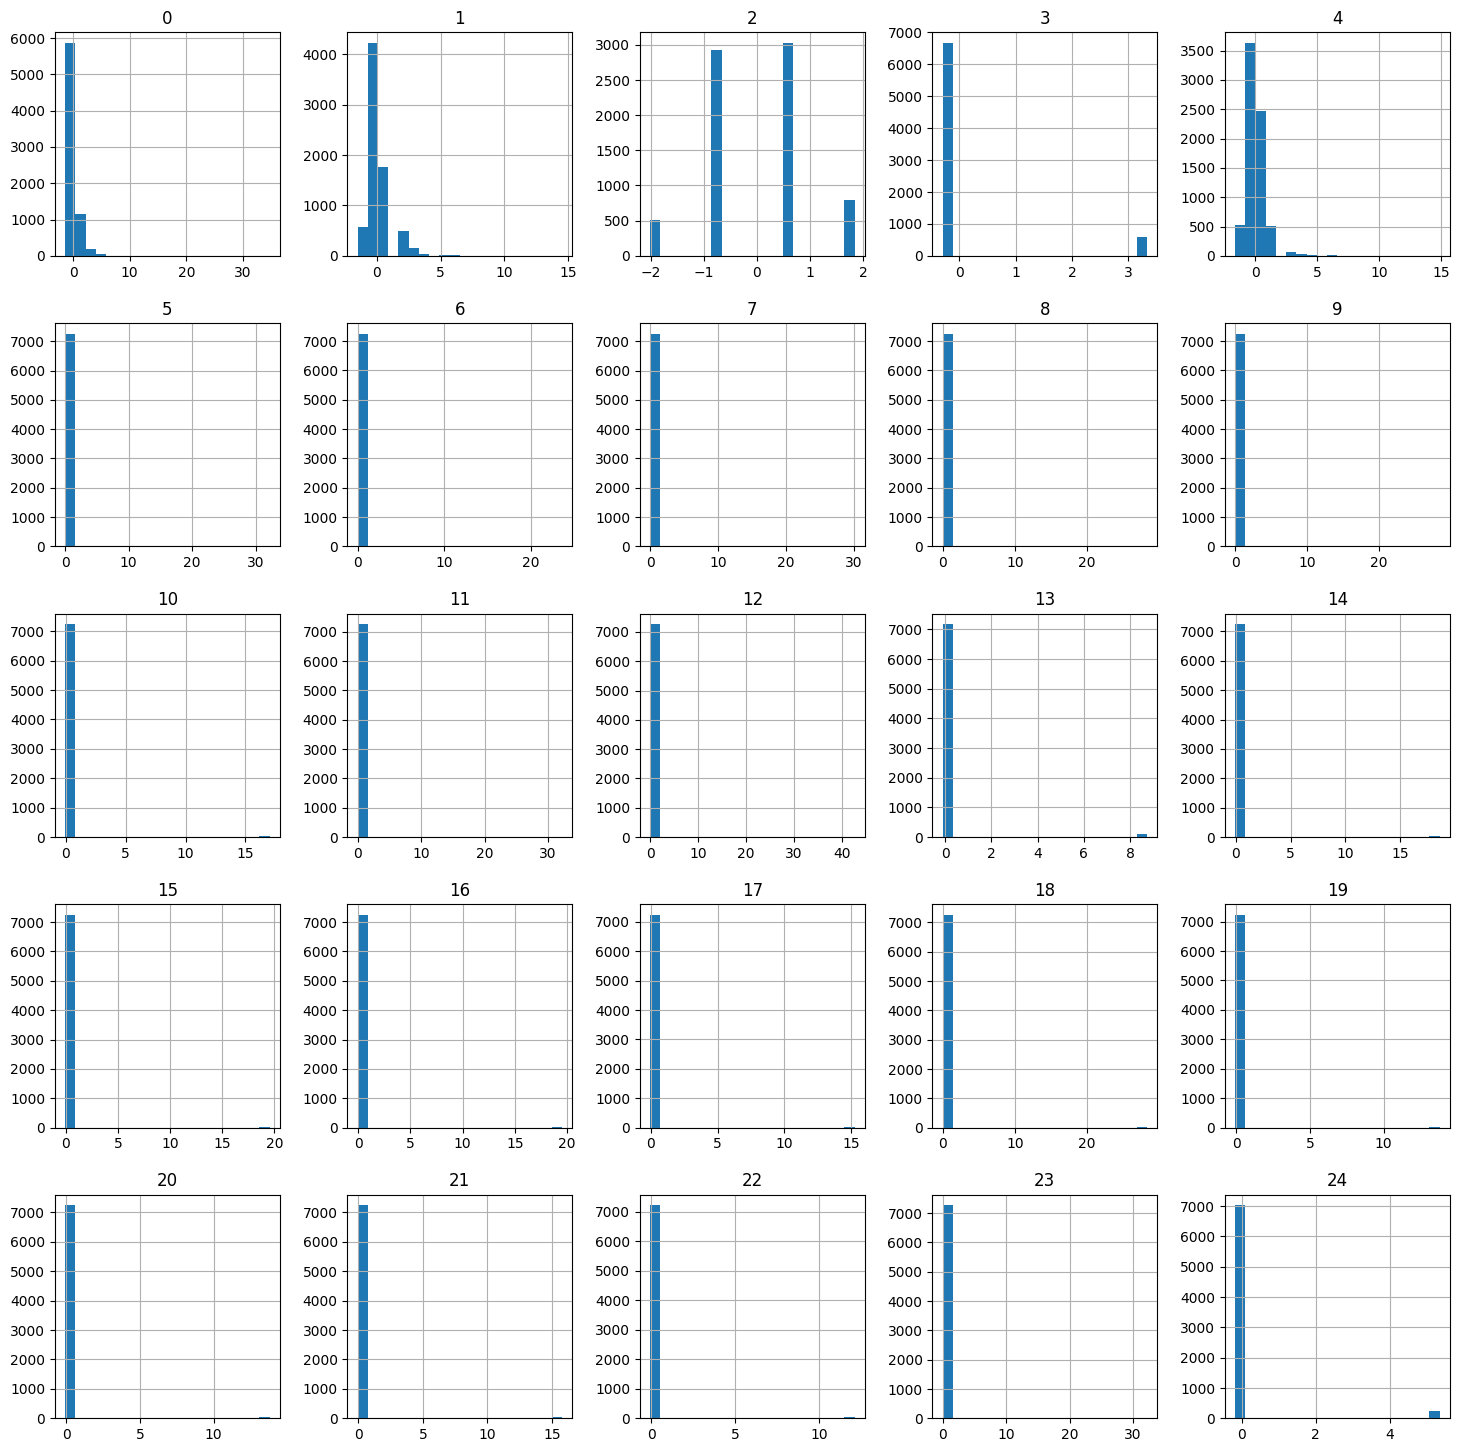

In [60]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
pd.DataFrame(X).hist(figsize=(18, 18), bins=20)

In [61]:
def evaluate_regression_model(model, X_test, y_test, threshold=0.5):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared (R2): {r2}')

    model_score = model.score(X_test, y_test)
    print(f'Model Score: {ceil(model_score * 100)}%')

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
evaluate_regression_model(lr_clf, X_test, y_test)

Mean Absolute Error (MAE): 19.756587209783557
Mean Squared Error (MSE): 989.1582198796409
R-squared (R2): 0.8306071518819167
Model Score: 84%


In [63]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
evaluate_regression_model(dt_reg, X_test, y_test)

Mean Absolute Error (MAE): 20.94996742236147
Mean Squared Error (MSE): 1321.7882229363527
R-squared (R2): 0.7736444309997517
Model Score: 78%


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
evaluate_regression_model(rf_reg, X_test, y_test)

Mean Absolute Error (MAE): 18.37253571329178
Mean Squared Error (MSE): 989.1998176878534
R-squared (R2): 0.8306000282781626
Model Score: 84%


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
num_features = X_train.shape[1]
column_names = [f'feature_{i}' for i in range(1, num_features + 1)]
X_train_df = pd.DataFrame(X_train, columns=column_names)
features_used = X_train_df.columns.tolist()
feature_columns = features_used

gb_reg.fit(X_train, y_train)
evaluate_regression_model(gb_reg, X_test, y_test)

Mean Absolute Error (MAE): 18.092381231331412
Mean Squared Error (MSE): 841.6775919363818
R-squared (R2): 0.8558631353105252
Model Score: 86%


In [66]:
from sklearn.linear_model import Ridge
ridge_clf = Ridge(alpha=1.0)
ridge_clf.fit(X_train, y_train)
evaluate_regression_model(ridge_clf, X_test, y_test)

Mean Absolute Error (MAE): 19.756993444477292
Mean Squared Error (MSE): 989.2189203094108
R-squared (R2): 0.8305967569638196
Model Score: 84%


In [67]:
from sklearn.linear_model import Lasso
lasso_clf = Lasso(alpha=1.0)
lasso_clf.fit(X_train, y_train)
evaluate_regression_model(lasso_clf, X_test, y_test)

Mean Absolute Error (MAE): 19.66787093130189
Mean Squared Error (MSE): 979.2126923868058
R-squared (R2): 0.8323103184675951
Model Score: 84%


In [68]:
y_pre = gb_reg.predict(X_test)

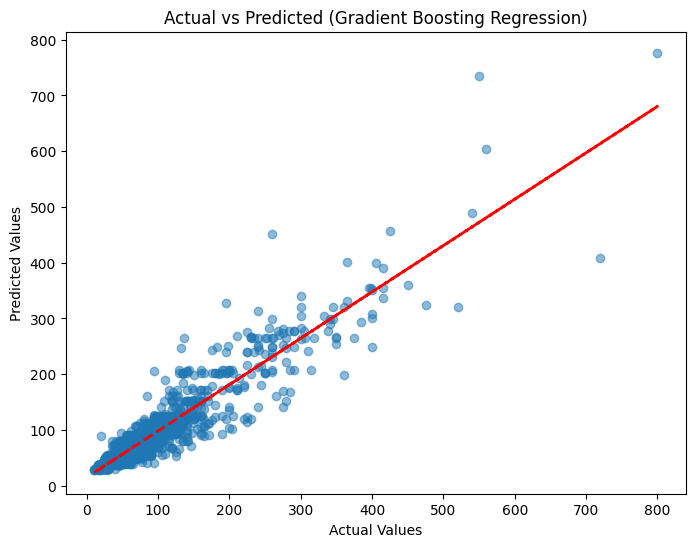

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pre, alpha=0.5)
plt.title('Actual vs Predicted (Gradient Boosting Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

fit_line = np.polyfit(y_test, y_pre, 1)
fit_fn = np.poly1d(fit_line)
plt.plot(y_test, fit_fn(y_test), color='red', linestyle='--', linewidth=2)
plt.show()

In [70]:
gb_reg.fit(X_train_df[features_used], y_train)

GradientBoostingRegressor()

In [71]:
import pandas as pd

def predict_price_for_new_data(gb_reg, feature_columns, new_data_point):
    try:
        new_data_point = new_data_point[feature_columns]
        predicted_price = gb_reg.predict(new_data_point)
        print(f'Predicted Price: {predicted_price[0]:.2f} Lakhs')
    except KeyError as e:
        print(f"Error: {e}. Make sure you entered values for all the required features.")

In [72]:
import random
num_objects = 10
new_data = []

for _ in range(num_objects):
    new_object = {}
    for col in features_used:
        if col == 'area_type_Plot Area':
            new_object[col] = random.randint(0, 1)
        else:
            new_object[col] = random.randint(0, 10) 
            
    new_data.append(new_object)

for i, new_data_point in enumerate(new_data, 1):
    new_data_point_df = pd.DataFrame([new_data_point], columns=features_used)
    predicted_price = gb_reg.predict(new_data_point_df[feature_columns])
    
    print(f'Predicted Price for Data Point {i}: {predicted_price[0]:.2f} Lakhs')

Predicted Price for Data Point 1: 756.86 Lakhs
Predicted Price for Data Point 2: 620.12 Lakhs
Predicted Price for Data Point 3: 595.48 Lakhs
Predicted Price for Data Point 4: 948.21 Lakhs
Predicted Price for Data Point 5: 752.19 Lakhs
Predicted Price for Data Point 6: 650.29 Lakhs
Predicted Price for Data Point 7: 536.45 Lakhs
Predicted Price for Data Point 8: 306.11 Lakhs
Predicted Price for Data Point 9: 495.03 Lakhs
Predicted Price for Data Point 10: 223.14 Lakhs
